# Varying Bin Size of Initial Digitization

In [1]:
#import all modules 
from sklearn.model_selection import train_test_split 
from sklearn.neighbors import KNeighborsClassifier 
import pandas as pd
import numpy as np
import os
from numpy import asarray, save, load
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression

### Load all bin sizes 

In [2]:
#insert the desired path containing combined data files
path = os.path.expanduser(r"~/Documents/python/identification_modified_proteins/bin_size_10.0")

#changes current working directory to the path given 
directory = os.chdir(path)

#load data 
bin_a_data = np.load('combined_train_10.0.npy', allow_pickle=True)
bin_a_df = pd.DataFrame(bin_a_data)

# Create feature and target arrays
X_bin_a = bin_a_df.drop(102, axis=1) 
y_bin_a = bin_a_df[102].astype('int') #last column is the modified or not modified feature

#split into training and test set
X_train_a, X_test_a, y_train_a, y_test_a = train_test_split(X_bin_a, y_bin_a, test_size = 0.4 , random_state=42)

In [3]:
#insert the desired path containing combined data files
path = os.path.expanduser(r"~/Documents/python/identification_modified_proteins/bin_size_1.0")

#changes current working directory to the path given 
directory = os.chdir(path)

#load data 
bin_b_data = np.load('combined_train_1.0.npy', allow_pickle=True)
bin_b_df = pd.DataFrame(bin_b_data)

# Create feature and target arrays
X_bin_b = bin_b_df.drop(1013, axis=1) 
y_bin_b = bin_b_df[1013].astype('int') #last column is the modified or not modified feature

#split into training and test set
X_train_b, X_test_b, y_train_b, y_test_b = train_test_split(X_bin_b, y_bin_b, test_size = 0.4 , random_state=42)

In [4]:
#insert the desired path containing combined data files
path = os.path.expanduser(r"~/Documents/python/identification_modified_proteins/bin_size_0.1")

#changes current working directory to the path given 
directory = os.chdir(path)

#load data 
bin_c_data = np.load('combined_train_0.1.npy', allow_pickle=True)
bin_c_df = pd.DataFrame(bin_c_data)

# Create feature and target arrays
X_bin_c = bin_c_df.drop(10130, axis=1) 
y_bin_c = bin_c_df[10130].astype('int') #last column is the modified or not modified feature

#split into training and test set
X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(X_bin_c, y_bin_c, test_size = 0.4 , random_state=42)

### KNN (no scaling applied)
No scaling improved the score as shown in previous investigations 

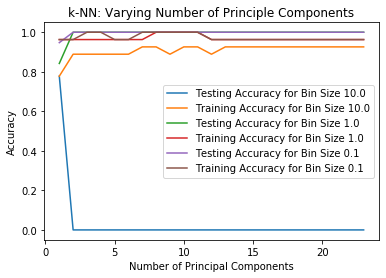

In [31]:
# Setup arrays to store train and test accuracies
n_components = np.arange(1, 24)
train_accuracy_a = np.empty(len(n_components))
test_accuracy_a = np.empty(len(n_components))
train_accuracy_b = np.empty(len(n_components))
test_accuracy_b = np.empty(len(n_components))
train_accuracy_c = np.empty(len(n_components))
test_accuracy_c = np.empty(len(n_components))

# Loop over different values of k
for i, k in enumerate(n_components):
    
    #setup a pipeline with a k-NN Classifier with k neighbors: knn
    pipe = Pipeline([
        ('reducer', PCA(n_components=k)),
        ('classifier', KNeighborsClassifier(n_neighbours=))])

    #fit the pipeline to to the training data
    pipe.fit(X_train_a, y_train_a)
    
    #Compute accuracy on the training set
    train_accuracy_a[i] = pipe.score(X_train_a, y_train_a)

    #Compute accuracy on the testing set
    test_accuracy_b[i] = pipe.score(X_test_a, y_test_a)
    
    #fit the pipeline to to the training data
    pipe.fit(X_train_b, y_train_b)
    
    #Compute accuracy on the training set
    train_accuracy_b[i] = pipe.score(X_train_b, y_train_b)

    #Compute accuracy on the testing set
    test_accuracy_b[i] = pipe.score(X_test_b, y_test_b)
    
    #fit the pipeline to to the training data
    pipe.fit(X_train_c, y_train_c)
    
    #Compute accuracy on the training set
    train_accuracy_c[i] = pipe.score(X_train_c, y_train_c)

    #Compute accuracy on the testing set
    test_accuracy_c[i] = pipe.score(X_test_c, y_test_c)

# Generate plot
plt.title('k-NN: Varying Number of Principle Components')
plt.plot(n_components, test_accuracy_a, label = 'Testing Accuracy for Bin Size 10.0')
plt.plot(n_components, train_accuracy_a, label = 'Training Accuracy for Bin Size 10.0')
plt.plot(n_components, test_accuracy_b, label = 'Testing Accuracy for Bin Size 1.0')
plt.plot(n_components, train_accuracy_b, label = 'Training Accuracy for Bin Size 1.0')
plt.plot(n_components, test_accuracy_c, label = 'Testing Accuracy for Bin Size 0.1')
plt.plot(n_components, train_accuracy_c, label = 'Training Accuracy for Bin Size 0.1')
plt.legend()
plt.xlabel('Number of Principal Components')
plt.ylabel('Accuracy')
plt.show()

In [15]:
#create second pipeline with no scaler
pipe = Pipeline([('reducer', PCA(4)),
                ('knn', KNeighborsClassifier(n_neighbors=7))])

#split into training and test set
X_train_a, X_test_a, y_train_a, y_test_a = train_test_split(X_bin_a, y_bin_a, test_size = 0.4 , random_state=42)

#fit the pipeline 
knn_pca_bin_a = pipe.fit(X_train_a, y_train_a)

#compute and print metrics
print('Bin Size 10 Accuracy: {}'.format(knn_pca_bin_a.score(X_test_a, y_test_a)))


Bin Size 10 Accuracy: 0.8947368421052632


In [19]:
#split into training and test set
X_train_b, X_test_b, y_train_b, y_test_b = train_test_split(X_bin_b, y_bin_b, test_size = 0.4 , random_state=42)

#fit the second pipeline
knn_pca_bin_b = pipe.fit(X_train_b, y_train_b)

print('Bin Size (1.0) Accuracy: {}'.format(knn_pca_bin_b.score(X_test_b, y_test_b)))

Bin Size (1.0) Accuracy: 1.0


In [18]:
#split into training and test set
X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(X_bin_c, y_bin_c, test_size = 0.4 , random_state=42)

#fit the third pipeline
knn_pca_bin_c = pipe.fit(X_train_c, y_train_c)

print('Bin Size 0.1 Accuracy: {}'.format(knn_pca_bin_c.score(X_test_c, y_test_c)))

Bin Size 0.1 Accuracy: 0.9473684210526315


### Logistic Regression

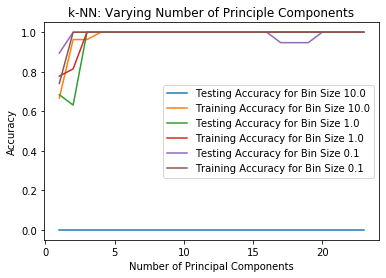

In [5]:
# Setup arrays to store train and test accuracies
n_components = np.arange(1, 24)
train_accuracy_a = np.empty(len(n_components))
test_accuracy_a = np.empty(len(n_components))
train_accuracy_b = np.empty(len(n_components))
test_accuracy_b = np.empty(len(n_components))
train_accuracy_c = np.empty(len(n_components))
test_accuracy_c = np.empty(len(n_components))

# Loop over different values of k
for i, k in enumerate(n_components):
    
    #setup a pipeline with a k-NN Classifier with k neighbors: knn
    pipe = Pipeline([
        ('reducer', PCA(n_components=k)),
        ('classifier', LogisticRegression())])

    #fit the pipeline to to the training data
    pipe.fit(X_train_a, y_train_a)
    
    #Compute accuracy on the training set
    train_accuracy_a[i] = pipe.score(X_train_a, y_train_a)

    #Compute accuracy on the testing set
    test_accuracy_b[i] = pipe.score(X_test_a, y_test_a)
    
    #fit the pipeline to to the training data
    pipe.fit(X_train_b, y_train_b)
    
    #Compute accuracy on the training set
    train_accuracy_b[i] = pipe.score(X_train_b, y_train_b)

    #Compute accuracy on the testing set
    test_accuracy_b[i] = pipe.score(X_test_b, y_test_b)
    
    #fit the pipeline to to the training data
    pipe.fit(X_train_c, y_train_c)
    
    #Compute accuracy on the training set
    train_accuracy_c[i] = pipe.score(X_train_c, y_train_c)

    #Compute accuracy on the testing set
    test_accuracy_c[i] = pipe.score(X_test_c, y_test_c)

# Generate plot
plt.title('k-NN: Varying Number of Principle Components')
plt.plot(n_components, test_accuracy_a, label = 'Testing Accuracy for Bin Size 10.0')
plt.plot(n_components, train_accuracy_a, label = 'Training Accuracy for Bin Size 10.0')
plt.plot(n_components, test_accuracy_b, label = 'Testing Accuracy for Bin Size 1.0')
plt.plot(n_components, train_accuracy_b, label = 'Training Accuracy for Bin Size 1.0')
plt.plot(n_components, test_accuracy_c, label = 'Testing Accuracy for Bin Size 0.1')
plt.plot(n_components, train_accuracy_c, label = 'Training Accuracy for Bin Size 0.1')
plt.legend()
plt.xlabel('Number of Principal Components')
plt.ylabel('Accuracy')
plt.show()

In [6]:
#create second pipeline with no scaler
pipe = Pipeline([('reducer', PCA(4)),
                ('logreg', LogisticRegression())])

#split into training and test set
X_train_a, X_test_a, y_train_a, y_test_a = train_test_split(X_bin_a, y_bin_a, test_size = 0.4 , random_state=42)

#fit the pipeline 
knn_pca_bin_a = pipe.fit(X_train_a, y_train_a)

#compute and print metrics
print('Bin Size 10 Accuracy: {}'.format(knn_pca_bin_a.score(X_test_a, y_test_a)))

Bin Size 10 Accuracy: 0.9473684210526315


In [7]:
#split into training and test set
X_train_b, X_test_b, y_train_b, y_test_b = train_test_split(X_bin_b, y_bin_b, test_size = 0.4 , random_state=42)

#fit the second pipeline
knn_pca_bin_b = pipe.fit(X_train_b, y_train_b)

print('Bin Size (1.0) Accuracy: {}'.format(knn_pca_bin_b.score(X_test_b, y_test_b)))

Bin Size (1.0) Accuracy: 1.0


In [8]:
#split into training and test set
X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(X_bin_c, y_bin_c, test_size = 0.4 , random_state=42)

#fit the third pipeline
knn_pca_bin_c = pipe.fit(X_train_c, y_train_c)

print('Bin Size 0.1 Accuracy: {}'.format(knn_pca_bin_c.score(X_test_c, y_test_c)))

Bin Size 0.1 Accuracy: 1.0
